In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000, size= 1500)
lngs= np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Use the print() ufnction to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-48.40801462200981 -88.14347145493451
-72.65152505865724 -83.6906861961594
-39.06247059512586 -148.5200244307207
19.94833893527293 -174.52715484798375
69.23220661202981 -82.6321228569324
-3.7403085003307837 151.98443013792576
32.78544919531606 -154.0914686922415
9.342105703459012 -2.298914316398168
33.951996400386975 30.693420842668274
-28.70941807842337 7.434792523311529
-78.68463663162194 11.452829559985304
38.91424988309973 -78.69832664290502
87.89304256128156 143.06716149631535
58.640685206645486 -22.2070024482353
56.72900220668231 145.48255756723393
-2.465679092729914 -36.85313911647779
-10.749674637558016 78.0073344514355
-61.674081835427074 89.99712779988744
27.665363753195052 -150.6280562609308
4.6439050188399165 175.6109023542728
-6.521776959075538 -131.41780402986564
10.040625318545295 -38.55146595001452
-79.97227546115398 -69.87861140173287
-65.28453591250997 172.6549651303365
27.94201629685422 165.46931400799969
37.88022856267281 -38.13604378007659
33.142030497369205 48.696

-87.83295381464313 -68.43768598202244
-74.15740734760979 -8.924087116745085
-87.85280341826078 145.03338651230257
-30.523910226417485 -97.283371320265
36.77406244476212 -48.41365875333153
-34.8854993734417 39.76107835284361
-60.98881891969386 -66.74621451240853
82.04286688434664 61.18664789356845
-9.77719334854821 -126.73106558950657
-22.241437000953965 -96.01195407127963
28.128241387886703 6.281004089724888
-89.40652821547496 70.92004562696212
-44.44407093857145 174.41208451187833
58.019048810381804 18.703596341538173
46.81888567629906 -178.67979448095844
76.111841879261 -68.99249209807448
37.936166472138396 -85.08283554297388
31.327986964047625 105.98759106362888
62.64236176545438 40.81241065421091
-69.13948599985522 119.6713306402392
26.52903353806896 -6.061126089991518
47.80622010994708 100.67973179057333
-77.01464666578302 61.49430765032818
21.680052397853743 81.5349602830276
39.72475092338652 -157.56879033706883
23.322165080298547 -78.4657373726792
-9.174253739280957 150.84371071

In [5]:
from citipy import citipy

In [6]:
#Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination. 
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count.
len(cities)

624

In [7]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=56704f47c904e41ddefeadd265c03ac2


In [9]:
#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_country = city_weather["sys"]["country"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        description = city_weather['weather'][0]['description']
        
        # Convert the date to ISO
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information to the city_data list
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current Description":description,
                         "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | clyde river
Processing Record 6 of Set 1 | namatanai
Processing Record 7 of Set 1 | bouna
Processing Record 8 of Set 1 | pafos
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | harrisonburg
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | vestmannaeyjar
Processing Record 14 of Set 1 | okhotsk
Processing Record 15 of Set 1 | aquiraz
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | kahului
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | itarema
Processing Record 22 of Set 1 | ushuaia
Processing Re

Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | longyearbyen
Processing Record 41 of Set 4 | mudgee
Processing Record 42 of Set 4 | karaj
Processing Record 43 of Set 4 | karratha
Processing Record 44 of Set 4 | muros
Processing Record 45 of Set 4 | narsaq
Processing Record 46 of Set 4 | alta floresta
Processing Record 47 of Set 4 | lagunas
Processing Record 48 of Set 4 | auki
Processing Record 49 of Set 4 | bambanglipuro
Processing Record 50 of Set 4 | nikolskoye
Processing Record 1 of Set 5 | hasaki
Processing Record 2 of Set 5 | seoul
Processing Record 3 of Set 5 | ostrovnoy
Processing Record 4 of Set 5 | safwah
City not found. Skipping...
Processing Record 5 of Set 5 | labuhan
Processing Record 6 of Set 5 | baykit
Processing Record 7 of Set 5 | tondano
Processing Record 8 of Set 5 | xiongyue
Processing Record 9 of Set 5 | mixtequilla
City not found. Skipping...
Processing Record 10 of Set 5 | kenai
Processing Record 11 of Set 5 | krasnyy yar
Processing Rec

Processing Record 31 of Set 8 | mihai bravu
Processing Record 32 of Set 8 | robertson
Processing Record 33 of Set 8 | guadalajara
Processing Record 34 of Set 8 | vostok
Processing Record 35 of Set 8 | waipawa
Processing Record 36 of Set 8 | lata
Processing Record 37 of Set 8 | boyolangu
Processing Record 38 of Set 8 | luebo
Processing Record 39 of Set 8 | dudinka
Processing Record 40 of Set 8 | cabo san lucas
Processing Record 41 of Set 8 | fairbanks
Processing Record 42 of Set 8 | meulaboh
Processing Record 43 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 44 of Set 8 | booue
Processing Record 45 of Set 8 | mehamn
Processing Record 46 of Set 8 | tacoronte
Processing Record 47 of Set 8 | chuy
Processing Record 48 of Set 8 | nizhniy kislyay
Processing Record 49 of Set 8 | penzance
Processing Record 50 of Set 8 | berlevag
Processing Record 1 of Set 9 | holovyne
Processing Record 2 of Set 9 | le port
Processing Record 3 of Set 9 | palimbang
Processing Record 4 of Set 9 

Processing Record 20 of Set 12 | bonthe
Processing Record 21 of Set 12 | havre-saint-pierre
Processing Record 22 of Set 12 | immenstadt
Processing Record 23 of Set 12 | port moresby
Processing Record 24 of Set 12 | cayenne
Processing Record 25 of Set 12 | sur
Processing Record 26 of Set 12 | teguise
Processing Record 27 of Set 12 | wuzhou
Processing Record 28 of Set 12 | batagay
Processing Record 29 of Set 12 | sao gabriel da cachoeira
Processing Record 30 of Set 12 | koumac
Processing Record 31 of Set 12 | te anau
Processing Record 32 of Set 12 | englewood
Processing Record 33 of Set 12 | kidal
Processing Record 34 of Set 12 | ntchisi
Processing Record 35 of Set 12 | wanlaweyn
Processing Record 36 of Set 12 | fairmont
Processing Record 37 of Set 12 | ayer itam
City not found. Skipping...
Processing Record 38 of Set 12 | chardara
Processing Record 39 of Set 12 | koran
Processing Record 40 of Set 12 | kapit
Processing Record 41 of Set 12 | jakhal mandi
City not found. Skipping...
Proces

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description,Date
0,Castro,BR,-24.7911,-50.0119,46.11,83,99,11.39,overcast clouds,2022-08-30 10:38:11
1,Punta Arenas,CL,-53.1500,-70.9167,39.31,87,75,9.22,broken clouds,2022-08-30 10:41:04
2,Mataura,NZ,-46.1927,168.8643,43.48,93,100,2.55,overcast clouds,2022-08-30 10:41:04
3,Kapaa,US,22.0752,-159.3190,79.12,85,75,13.80,moderate rain,2022-08-30 10:41:05
4,Clyde River,CA,70.4692,-68.5914,35.83,100,100,11.50,overcast clouds,2022-08-30 10:41:05
5,Namatanai,PG,-3.6667,152.4333,79.00,84,42,8.14,light rain,2022-08-30 10:41:05
6,Bouna,CI,9.2667,-3.0000,76.98,83,92,3.47,moderate rain,2022-08-30 10:41:06
7,Pafos,CY,34.7667,32.4167,87.22,70,0,16.11,clear sky,2022-08-30 10:41:06
8,Luderitz,NA,-26.6481,15.1594,65.79,50,0,10.65,clear sky,2022-08-30 10:41:07
9,Hermanus,ZA,-34.4187,19.2345,60.80,49,60,24.83,broken clouds,2022-08-30 10:41:07


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]

In [17]:
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2022-08-30 10:38:11,-24.7911,-50.0119,46.11,83,99,11.39
1,Punta Arenas,CL,2022-08-30 10:41:04,-53.1500,-70.9167,39.31,87,75,9.22
2,Mataura,NZ,2022-08-30 10:41:04,-46.1927,168.8643,43.48,93,100,2.55
3,Kapaa,US,2022-08-30 10:41:05,22.0752,-159.3190,79.12,85,75,13.80
4,Clyde River,CA,2022-08-30 10:41:05,70.4692,-68.5914,35.83,100,100,11.50
...,...,...,...,...,...,...,...,...,...
576,Bundaberg,AU,2022-08-30 10:39:18,-24.8500,152.3500,64.22,93,100,4.76
577,Bichena,ET,2022-08-30 10:44:09,10.4500,38.2000,63.27,69,77,3.85
578,Qrendi,MT,2022-08-30 10:44:09,35.8347,14.4583,87.46,55,20,8.05
579,Saint-Francois,FR,2022-08-30 10:44:10,46.4154,3.9054,70.68,78,100,9.22


In [18]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
#Extract relevant fields from the DataFrame for plotting.
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity= city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

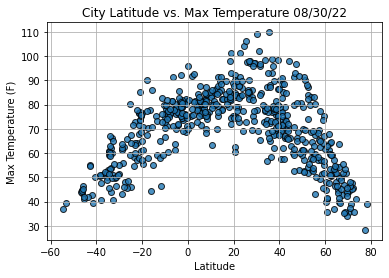

In [20]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

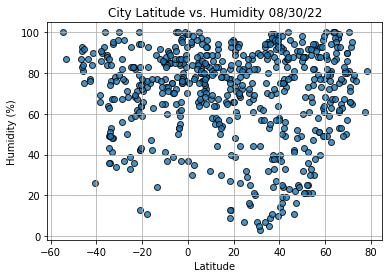

In [21]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

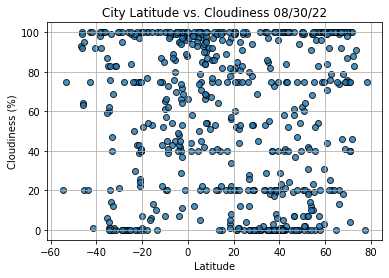

In [22]:
#Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

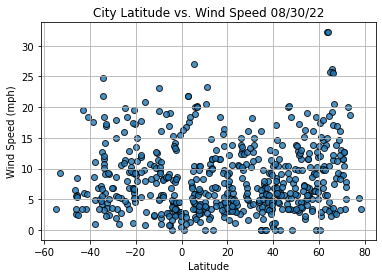

In [23]:
#Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [32]:
#Import linregress
from scipy.stats import linregress


In [104]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [105]:
index13=city_data_df.loc[13]
index13

City                      Aquiraz
Country                        BR
Date          2022-08-30 10:41:09
Lat                       -3.9014
Lng                      -38.3911
Max Temp                    85.44
Humidity                       61
Cloudiness                     43
Wind Speed                  15.35
Name: 13, dtype: object

In [106]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Kapaa,US,2022-08-30 10:41:05,22.0752,-159.3190,79.12,85,75,13.80
4,Clyde River,CA,2022-08-30 10:41:05,70.4692,-68.5914,35.83,100,100,11.50
6,Bouna,CI,2022-08-30 10:41:06,9.2667,-3.0000,76.98,83,92,3.47
7,Pafos,CY,2022-08-30 10:41:06,34.7667,32.4167,87.22,70,0,16.11
10,Harrisonburg,US,2022-08-30 10:41:07,38.4496,-78.8689,68.02,92,8,4.92


In [107]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df= city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]


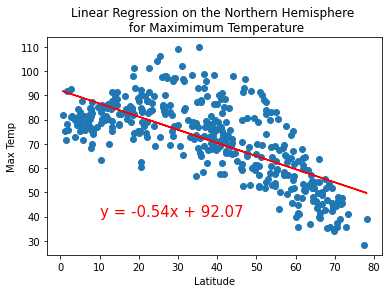

In [108]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values,y_values, 
                      "Linear Regression on the Northern Hemisphere \n for Maximimum Temperature", "Max Temp", (10,40))

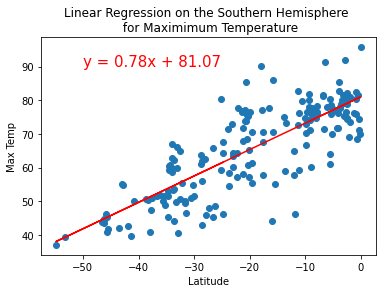

In [109]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values,y_values, 
                      "Linear Regression on the Southern Hemisphere \n for Maximimum Temperature", "Max Temp", (-50,90))

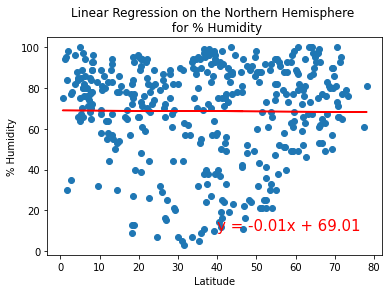

In [110]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#Call the function.
plot_linear_regression(x_values,y_values, 
                      "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity", (40,10))

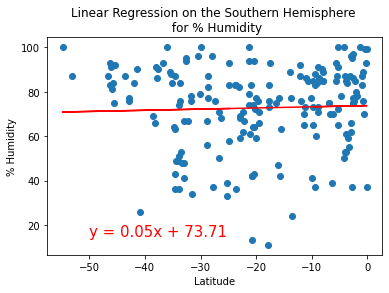

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

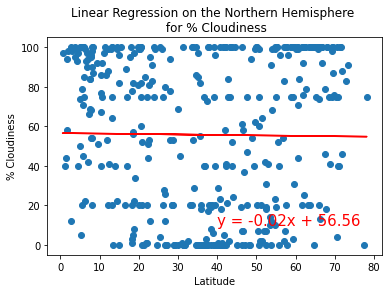

In [112]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function.
plot_linear_regression(x_values,y_values, 
                      "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness", (40,10))

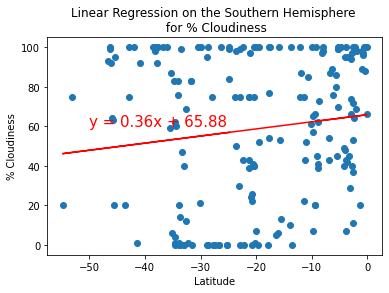

In [113]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

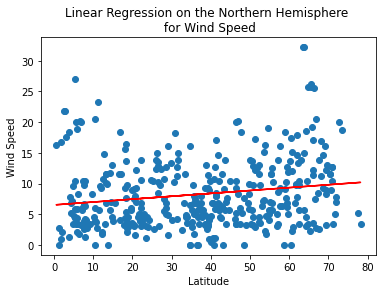

In [114]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#Call the function.
plot_linear_regression(x_values,y_values, 
                      "Linear Regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed", (40,35))

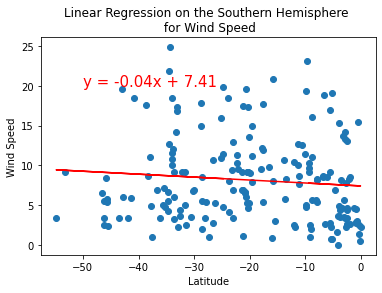

In [118]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))